## fitting sin 

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, CSVLogger

Using TensorFlow backend.


In [42]:
def dataset(n_samples, n_repeat=1):
    x = np.random.uniform(0, np.pi*2., size=(n_samples, 1))
    y = np.sin(x) + np.random.randn(x.shape[0], x.shape[1]) * 0.1
    xx = np.tile(x, (n_repeat, 1))
    yy = np.tile(y, (n_repeat, 1))
    return xx, yy

def build_model():
    model = Sequential()
    model.add(Dense(output_dim=3, input_dim=1, activation='tanh'))
    model.add(Dense(output_dim=1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

def get_callbacks():
    logger = CSVLogger('./logger.csv', append=False)
    hdf5_path = './weights.{epoch:02d}-{val_loss:.2f}.hdf5'
    checkpoint = ModelCheckpoint(hdf5_path, monitor='val_loss', save_best_only=True, verbose=1)
    return [logger, checkpoint]
    

In [68]:
n_train = 100000
n_repeat = int(1e5/n_train)
n_valid = 1000
train_x, train_y = dataset(n_train, n_repeat)
valid_x, valid_y = dataset(n_valid)
print(train_x.shape, train_y.shape)

((100000, 1), (100000, 1))


In [67]:
model = build_model()
callbacks = get_callbacks()

#model.fit(train_x, train_y, epochs=40, batch_size=32, validation_data=(valid_x, valid_y), callbacks=callbacks)

/home/huizhu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=3, activation="tanh", input_dim=1)`
/home/huizhu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="linear")`


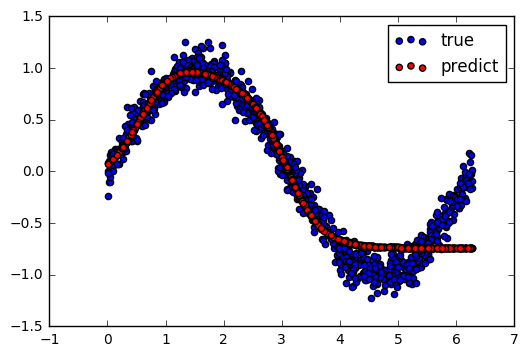

In [65]:
y_pred = model.predict(valid_x)
plt.scatter(valid_x[:, 0], valid_y[:, 0], label='true', c='b')
plt.scatter(valid_x[:, 0], y_pred[:, 0], label='predict', c='r')
plt.legend()
plt.show()

Now, we fix `n_samples * n_repeat == 1e5`, and the following fig shows how the model performs with respect to `n_samples`. As we can see **too much** training data (n_samples = 1e5) do not means better performance.


![](files_sin_fitting/sin_fitting_04.png)
